**Brian Blaylock**  
**January 28, 2019**

# Lake Christine Fire
A convective envent recommended by Robert Zeil. The fire started on 3 July 2018, cause by humans, and spread rapidly on 4 July 2018 due to thunderstom outflow or a gravity wave. Fuels were extreamly dry and RH was in single digits. 

On 4 July 2018, approximatly 1793 residents from 664 homes were evacuated. Three homes were destroyed. By 7 July, almost half of the evacuees returned to their homes.

## Research Questions

1. How well did the HRRR model forecast the thunderstorms for the area.
2. Did the GLM lightning flashes provide any warning? 
3. From the initial GLM flashes, what was the predicted risk of continued lightning and convective activity for the area?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import multiprocessing
import os

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/')
from BB_HRRR.HRRR_Pando import get_hrrr_variable
from BB_GOES.get_GLM import get_GLM_file_nearesttime, accumulate_GLM
from BB_datetimes.range import range_dates
from BB_maps.my_basemap import draw_centermap
from BB_cmap.reflectivity_cmap import reflect_ncdc
from fires_list import get_fire
from plot_HRRR_LTNG_GLM import make_plot

import matplotlib as mpl
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100

In [2]:
fire = get_fire('July Storm')
m = draw_centermap(fire['latitude'], fire['longitude'])

# Date info
sDATE = fire['sDATE']
eDATE = sDATE+timedelta(days=2)
DATES = range_dates(sDATE, eDATE, HOURS=True)

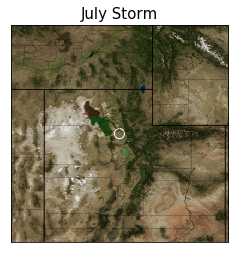

In [5]:
plt.title(fire['name'])
m.scatter(fire['longitude'], fire['latitude'], latlon=True, facecolors='none', edgecolors='w', s=100)
m.drawstates()
m.drawcounties()
m.arcgisimage()

99.4% Complete (180 of 181) : 2018-07-16 02:59:20

/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1480: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1481: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1169: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1169: RuntimeWarning: invalid value encountered in less
  inside = 

<Figure size 432x288 with 0 Axes>

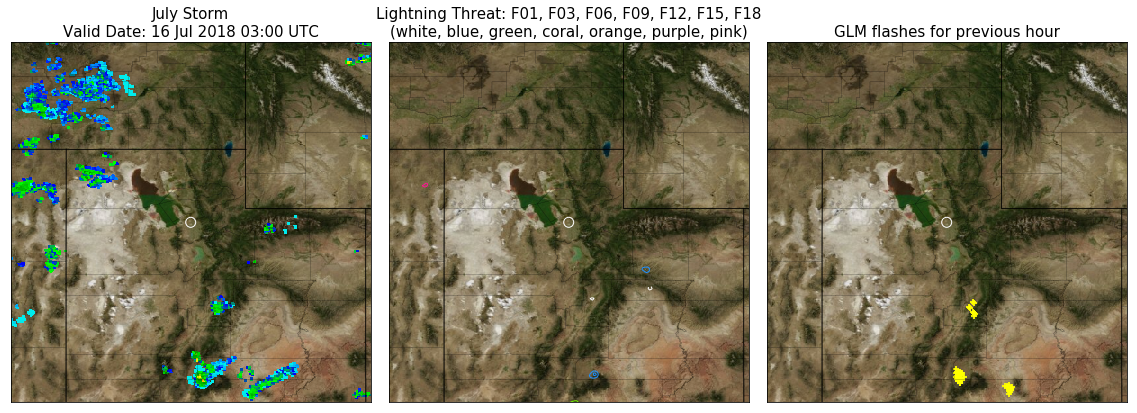

In [5]:
make_plot((fire, m, DATES[3]))

-----
(make many plots with the `plot_HRRR_LTNG_GLM.py` script)